In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import fpsnippets

df = pd.read_csv('AQEData.csv')

df['neighborhood'] = df.apply(
    lambda row: fpsnippets.geo_to_neighborhood(row['lat'], row['lon']),
    axis=1
)

neighborhood_stats = df.groupby('neighborhood').agg({
    'tons_per_yr': 'mean',  
    'lat': 'count'  
}).reset_index()

neighborhood_stats.columns = ['neighborhood', 'avg_tons_per_yr', 'num_reports']

neighborhood_stats_sorted = neighborhood_stats.sort_values(by='avg_tons_per_yr', ascending=True)

print("Neighborhoods with the lowest average air pollution:")
print(neighborhood_stats_sorted.head(15))

Neighborhoods with the lowest average air pollution:
                neighborhood  avg_tons_per_yr  num_reports
5                    Carrick         0.101935           31
14             Homewood West         0.101935           31
11                    Esplen         0.224615           26
24       Squirrel Hill South         0.246129           31
20        Point Breeze North         0.911000          130
27       Upper Lawrenceville         2.206758          171
15                   Larimer         3.340062          160
17       Lower Lawrenceville        17.921686          162
12                 Fairywood        19.017500           16
23          South Side Flats        39.216818           66
3                  Brookline        40.503105          233
4       California-Kirkbride        90.072273           22
2                      Bluff        95.582119          397
8                    Chateau       148.523571           14
16  Lincoln-Lemington-Belmar       150.384040           99


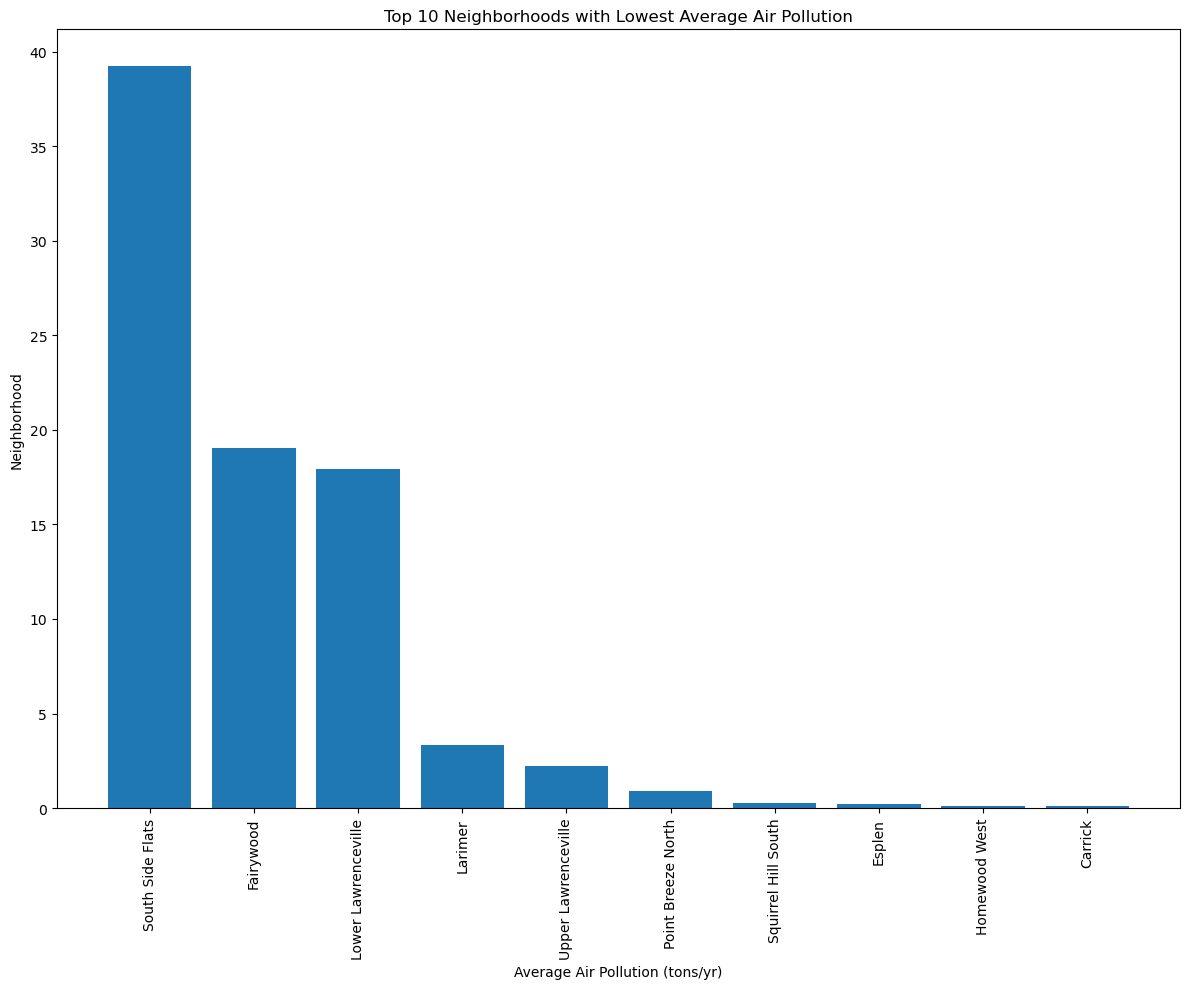

In [3]:
top_15_lowest = neighborhood_stats_sorted.head(10)
plt.figure(figsize=(12, 10))
plt.bar(
    top_15_lowest['neighborhood'].iloc[::-1],
    top_15_lowest['avg_tons_per_yr'].iloc[::-1]
)
plt.xlabel('Average Air Pollution (tons/yr)')
plt.ylabel('Neighborhood')
plt.title('Top 10 Neighborhoods with Lowest Average Air Pollution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()